## Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import string
import re
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

from gensim.models import Word2Vec
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Reading Datasets


In [33]:
df_fake_news = pd.read_csv(r"C:\Users\prach\OneDrive\Desktop\Files\20BCS1334_5\IndustrialTraining\dataset\Fake.csv")
df_true_news = pd.read_csv(r"C:\Users\prach\OneDrive\Desktop\Files\20BCS1334_5\IndustrialTraining\dataset\True.csv")

In [34]:
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [35]:
df_true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [36]:
df_fake_news['fake'] = 1
df_true_news['fake'] = 0

In [37]:
df_true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   fake     21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [38]:
# Concatenate fake and true news
df_news = pd.concat([df_fake_news, df_true_news])

In [39]:
df_news.sample(5)

,title,text,subject,date,fake
20310,South African court ruling delivers setback to...,CAPE TOWN (Reuters) - South Africa s President...,worldnews,"September 12, 2017",0
2313,Factbox: Trump on Twitter (Aug 4) - West Virgi...,The following statements were posted to the ve...,politicsNews,"August 4, 2017",0
19438,EU officials reach draft deal on more North Ko...,BRUSSELS (Reuters) - EU ambassadors have reach...,worldnews,"September 21, 2017",0
13934,GAME CHANGER: HOW TRUMP IS BRINGING BACK The “...,One of the most interesting and insightful pie...,politics,"May 10, 2016",1
5262,Democrats pick Perez to lead party against Trump,ATLANTA (Reuters) - U.S. Democrats elected for...,politicsNews,"February 25, 2017",0


In [40]:
# Check for any null values
df_news.isnull().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [41]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## Visualisation

<AxesSubplot:xlabel='fake', ylabel='count'>

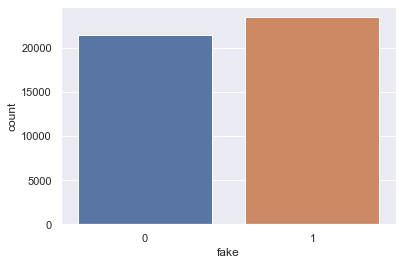

In [42]:
# Explore the target variable
sns.countplot(x='fake', data=df_news)

<AxesSubplot:xlabel='subject', ylabel='count'>

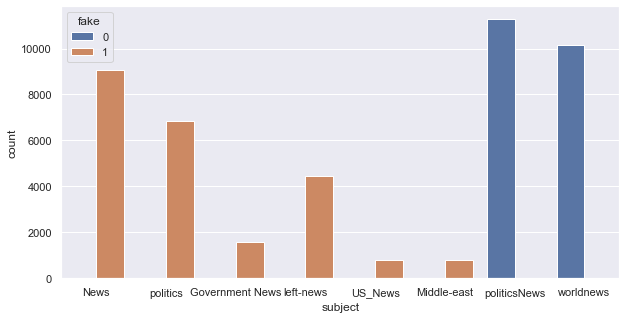

In [43]:
# Explore the subject column
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=df_news, hue='fake')

In [44]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaT.
df_news['Year'] = df_news['date'].dt.year
df_news['Month'] = df_news['date'].dt.month

df_news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<AxesSubplot:xlabel='Year', ylabel='count'>

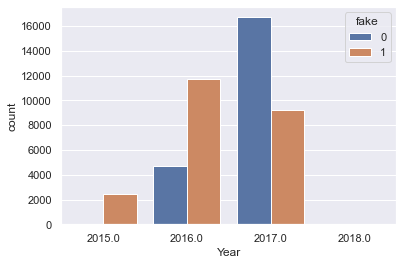

In [45]:
# check the impact of year on the target
sns.countplot(x='Year', data=df_news, hue='fake')

<AxesSubplot:xlabel='Month', ylabel='count'>

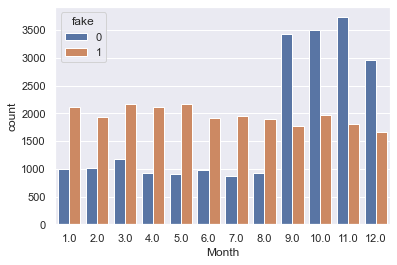

In [46]:
# check the impact of month on the target
sns.countplot(x='Month', data=df_news, hue='fake')

In [47]:
# combining the title and text column and drop title column
df_news['text'] = df_news['title'] + df_news['text']
df_news.drop(labels=['title'], axis=1, inplace=True)

In [48]:
df_news.sample(5)

,text,subject,date,fake,Year,Month
10157,"Youngstown, Ohio, mayor gets probation in corr...",politicsNews,2016-03-28,0,2016.0,3.0
7006,Health industry breathes easier as post-Obamac...,politicsNews,2016-11-30,0,2016.0,11.0
22632,GOD SQUAD: Jury Finds Polygamous Mormon Towns ...,US_News,2016-03-12,1,2016.0,3.0
11701,TJ MAXX AND MARSHALLS Tell Employees To Trash ...,politics,2017-02-09,1,2017.0,2.0
15883,One in five Indonesian students support Islami...,worldnews,2017-11-02,0,2017.0,11.0


In [49]:
# We will remove all attributes and go ahead with "text" attribute only
df_news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
df_news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [50]:
# Dataframe shuffling and feature and label extraction
df_news = df_news.sample(frac=1) # frac=1 means to return all rows (in random order)
df_news.head()

,text,fake
11061,Huckabee says he will attend Trump event for v...,0
18791,WOW! Dem Rep Keith Ellison BLAMES Obama For Hu...,1
6028,Health insurers quietly shape Obamacare replac...,0
10976,U.S. Navy examining rise in health issues amon...,0
13509,Honduran opposition candidate rejects official...,0


In [51]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(
    df_news['text'].to_numpy(),
    df_news['fake'].to_numpy(),
    test_size=0.2,
    random_state=42)

In [52]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(35918, 8980, 35918, 8980)

In [54]:
## Vectorization

In [55]:
# Tokenization is the process of splitting a stream of language into individual tokens. 
# Vectorization is the process of converting string data into a numerical representation
# tokenization - youtube.com/watch?v=fNxaJsNG3-s
# finding average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

417

In [56]:
max_vocab_length = 10000
max_length = 418

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [57]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [58]:
sample_sentence_vectorizer = "Just checking the text vectorizer"
text_vectorizer([sample_sentence_vectorizer])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[  77, 8249,    2, 2859,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [59]:
# checking

import random

random_sentence = random.choice(train_sentences)

print(f"Original text;\n{random_sentence}\\n\n\nVectorized Version:{text_vectorizer([random_sentence])}")

Original text;
Clinton says 'there is no case here' in FBI email investigationKENT, Ohio (Reuters) - Democratic presidential candidate Hillary Clinton said on Monday that she welcomed the FBI to look at the emails in the latest twist in the controversy over her use of a private server while she was secretary of state. “There is no case here,” Clinton said at a rally at Kent State University, telling supporters she was confident the FBI would reach the same conclusion as it did in a year-long investigation - that there were no grounds for any charges. \n

Vectorized Version:[[  72  144   67   12   66  238  190    7  252  500    1 1369   69  150
   140  248  110   72   14    9  221    8   52 2835    2  252    3  386
    27    2  593    7    2  626 6684    7    2 2004   65   53  247    4
     5  479 1704  114   52   18  220    4   59 2627   12   66  238 7589
    72   14   27    5  661   27    1   59  490 1013  321   52   18 2889
     2  252   35 1308    2  250 3079   19   16  112    7    

## Creating embedding

In [60]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length)

In [61]:
# Get a random sentence from the training set
new_random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedd version: {embedding(text_vectorizer([random_sentence]))}")

Original text:
Clinton says 'there is no case here' in FBI email investigationKENT, Ohio (Reuters) - Democratic presidential candidate Hillary Clinton said on Monday that she welcomed the FBI to look at the emails in the latest twist in the controversy over her use of a private server while she was secretary of state. “There is no case here,” Clinton said at a rally at Kent State University, telling supporters she was confident the FBI would reach the same conclusion as it did in a year-long investigation - that there were no grounds for any charges. 

Embedd version: [[[ 0.03650737 -0.00613208 -0.01078476 ...  0.00590787 -0.04562671
    0.01977602]
  [-0.00813862  0.01825011 -0.01412333 ... -0.04935833 -0.01040839
   -0.04406475]
  [-0.01660941 -0.01680375 -0.02661673 ...  0.03371371 -0.04290056
    0.01870036]
  ...
  [ 0.00378507  0.03569075  0.01797019 ...  0.01763206 -0.02061873
    0.02987157]
  [ 0.00378507  0.03569075  0.01797019 ...  0.01763206 -0.02061873
    0.02987157]
  [ 

## Modelling

In [63]:
import tensorflow as tf
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')

# Pass inputs to text_vectorizer(convert text into numbers)
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)

# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# Pass inputs and outputs to our model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [64]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 418)               0         
_________________________________________________________________
embedding (Embedding)        (None, 418, 128)          1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [66]:
model_history = model.fit(train_sentences,
                          train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels))

Epoch 1/5
1123/1123 [==============================] - 272s 240ms/step - loss: 0.5365 - accuracy: 0.7121 - val_loss: 0.2666 - val_accuracy: 0.9209
Epoch 2/5
1123/1123 [==============================] - 259s 231ms/step - loss: 0.3456 - accuracy: 0.8723 - val_loss: 0.3331 - val_accuracy: 0.8052
Epoch 3/5
1123/1123 [==============================] - 278s 248ms/step - loss: 0.3264 - accuracy: 0.8580 - val_loss: 0.5156 - val_accuracy: 0.8588
Epoch 4/5
1123/1123 [==============================] - 282s 251ms/step - loss: 0.1972 - accuracy: 0.9407 - val_loss: 0.1425 - val_accuracy: 0.9457
Epoch 5/5
1123/1123 [==============================] - 274s 244ms/step - loss: 0.1230 - accuracy: 0.9669 - val_loss: 0.0887 - val_accuracy: 0.9787


In [67]:
model_prediction = model.predict(val_sentences)
model_prediction[:10]

array([[0.9947643 ],
       [0.0127227 ],
       [0.99534917],
       [0.01396143],
       [0.01005965],
       [0.9842006 ],
       [0.98420954],
       [0.01428166],
       [0.9842007 ],
       [0.9842006 ]], dtype=float32)

In [68]:
# Convert model prediction to our val_labels
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.], dtype=float32)>

In [69]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

print(f"Accuracy Score: {accuracy_score(val_labels,model_preds)}")
print(f"Recall Score : {recall_score(val_labels, model_preds)}")
print(f"Precsion Score : {precision_score(val_labels, model_preds)}")
print(f"f1 Score : {f1_score(val_labels, model_preds)}")

Accuracy Score: 0.9787305122494432
Recall Score : 0.9732217573221758
Precsion Score : 0.9866383881230116
f1 Score : 0.979884149552396
